# Análise palavras fontes de dados

In [21]:
# Modulos da propria aplicacao
from fonte_dados.fabrica import FabricaFonteDados, NERDS_VIAJANTES, WIKIPEDIA
from repository.verbos import VerbosRepo

from repository.mongo_utils import get_pages_content_collection
from repository.wikipedia import WikipediaRepo

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Obtenção de informações de palavras de fontes de dados

In [22]:
fabrica = FabricaFonteDados()
verbo_repo = VerbosRepo()
verbos_stemmed = verbo_repo.find_all_stemmed()

In [23]:
def obter_tokens_nao_verbo(documento):
    return [token for token in documento if token not in verbos_stemmed]

def obter_documentos_sem_verbo(documentos):
    return [obter_tokens_nao_verbo(documento) for documento in documentos]

def obter_tamanhos_documentos(documentos):
    return [len(doc) for doc in documentos]

In [24]:
def obter_informacoes_palavras(descricao_fonte_de_dados):
    fonte_dados_origem = fabrica.get_fonte_dados(NERDS_VIAJANTES)
    fonte_dados_origem.carregar_dados()
    documentos_origem = fonte_dados_origem.get_tokens()
    tamanhos_documentos = obter_tamanhos_documentos(documentos_origem)
    documentos_sem_verbo = obter_documentos_sem_verbo(documentos_origem)
    tamanhos_sem_verbo = obter_tamanhos_documentos(documentos_sem_verbo)
    percentual_nao_verbo = 100 * (np.array(tamanhos_sem_verbo) / np.array(tamanhos_documentos))
    return pd.DataFrame(
        data = { 
            'documento': documentos_origem, 
            'tamanho': tamanhos_documentos, 
            'documento_nao_verbo': documentos_sem_verbo, 
            'tamanho_sem_verbo': tamanhos_sem_verbo,
            'percentual_nao_verbo': percentual_nao_verbo
        })

## Análises gráficas de palavras de fontes de dados

In [25]:
"""
Distribuicao de tokens que nao sao verbo nos documentos.
"""
def analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados):
    sns.displot(informacoes_fonte_de_dados, x='percentual_nao_verbo', kind='hist', aspect=1.2)

In [26]:
"""
Distribuicao de tamanhos de documentos diferenciando por conter verbo ou nao.
"""
def analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=False, x_max=5000):
    if bidimensional:
        tidy = informacoes_fonte_de_dados[informacoes_fonte_de_dados['tamanho'] <= x_max]
        sns.displot(tidy, x='tamanho', y='tamanho_sem_verbo', kind='hist', aspect=1.2, height=6)
    else:
        tidy = informacoes_fonte_de_dados[['tamanho', 'tamanho_sem_verbo']].melt().rename(columns={'variable': 'descricao_tamanho' })
        sns.displot(tidy, x='value', kind='hist', aspect=1.2, hue='descricao_tamanho', kde=True, multiple='dodge')

In [27]:
"""
Distribuicao de tamanhos dos documentos. O parametro indicador_tamanho eh usado para definir se o tamanho eh o original ou 
o tamanho sem verbo. Possiveis valores: 'tamanho', 'tamanho_sem_verbo'
"""
def analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho', x_max=5000):
    limitado = informacoes_fonte_de_dados[informacoes_fonte_de_dados[indicador_tamanho] <= x_max]
    sns.displot(limitado, x=indicador_tamanho, kind='hist', aspect=1.2)

## Análise palavras - Nerds Viajantes

In [28]:
informacoes_fonte_de_dados = obter_informacoes_palavras(NERDS_VIAJANTES)

## Análise fonte de dados selecionada

### Distribuição de percentuais de tokens não verbo no documento

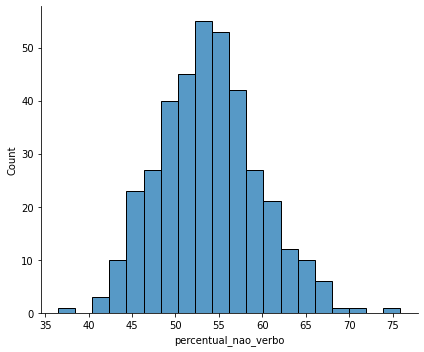

In [29]:
analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados)

### Distribuição de tamanho de documento

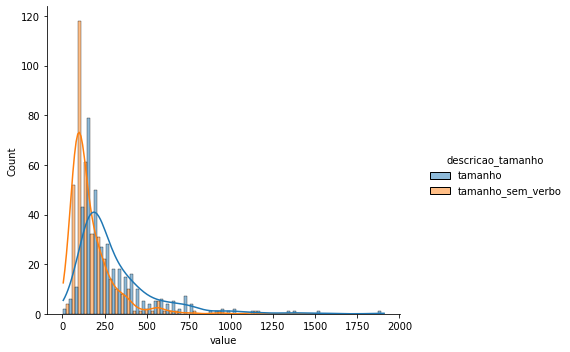

In [30]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados)

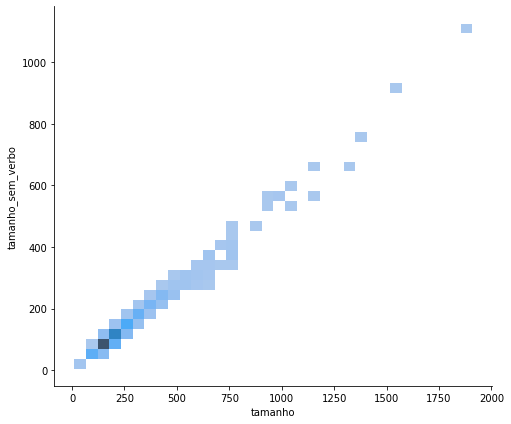

In [31]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True)

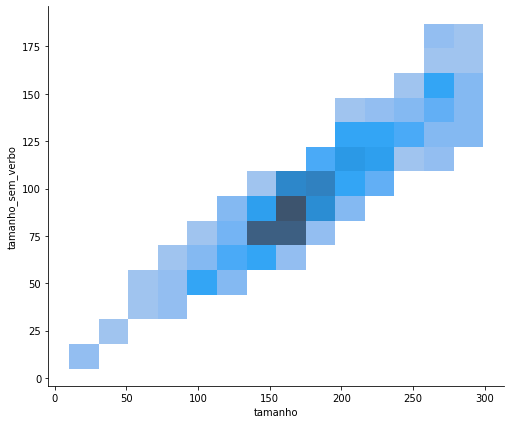

In [32]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True, x_max=300)

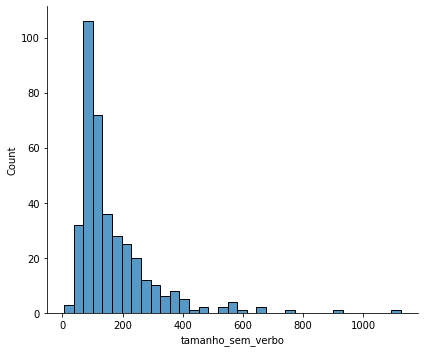

In [33]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho_sem_verbo')

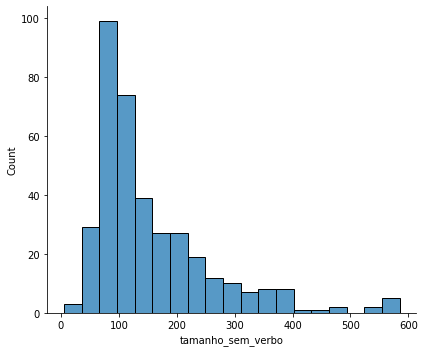

In [34]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho_sem_verbo', x_max=600)

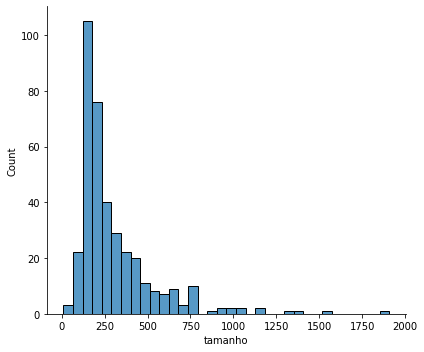

In [35]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados)

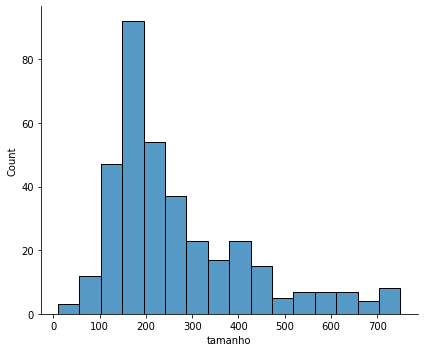

In [36]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, x_max=750)

## Análises Estatísticas de Fonte de Dados

In [37]:
from collections import Counter

In [58]:
def obter_todos_tokens(informacoes_fonte_de_dados, coluna_documento):
    documentos = list(informacoes_fonte_de_dados[coluna_documento].values)
    return [token for documento in documentos for token in documento]

In [71]:
"""
Exibicao de total geral dos tokens da coluna de documentos selecionada
"""
def exibir_total_tokens(todos_tokens, coluna_documento):
    print(f'O total de tokens de todos os documentos para a coluna "{coluna_documento}" eh {len(todos_tokens)}')

In [78]:
"""
Exibicao de top n tokens mais comuns, ordenados do mais frequente para o menos frequente
"""
def exibir_tokens_mais_comuns(todos_tokens, n=10):
    print(Counter(todos_tokens).most_common(n))

In [95]:
"""
Descricao estatistica dos tamanhos dos documentos no corpo. Exibe diversas informacoes estatisticas, como media, desvio padra, etc,
alem dos percentiles selecionados
"""
def analisar_tamanhos_documentos(informacoes_fonte_de_dados):
    print(informacoes_fonte_de_dados[['tamanho', 'tamanho_sem_verbo']].describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]))

## Análise estatística da fonte selecionada

### Contagem geral de tokens

In [87]:
todos_tokens = obter_todos_tokens(informacoes_fonte_de_dados, 'documento')
exibir_total_tokens(todos_tokens, 'documento')

O total de tokens de todos os documentos para a coluna "documento" eh 115393


In [73]:
todos_tokens_sem_verbo = obter_todos_tokens(informacoes_fonte_de_dados, 'documento_nao_verbo')
exibir_total_tokens(todos_tokens_sem_verbo, 'documento_nao_verbo')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo" eh 62312


### Exibição de tokens mais frequentes

#### 10 tokens mais frequentes

In [76]:
print('10 Tokens mais comuns entre todos os tokens:')
exibir_tokens_mais_comuns(todos_tokens)

print('10 Tokens mais comuns eliminando os verbos:')
exibir_tokens_mais_comuns(todos_tokens_sem_verbo)

10 Tokens mais comuns entre todos os tokens:
[('fot', 1550), ('fic', 807), ('algum', 750), ('dia', 720), ('par', 660), ('caminh', 639), ('faz', 634), ('cheg', 611), ('pod', 599), ('visit', 581)]
10 Tokens mais comuns eliminando os verbos:
[('fot', 1550), ('algum', 750), ('dia', 720), ('passei', 560), ('parqu', 557), ('outr', 551), ('bem', 538), ('cidad', 534), ('muit', 502), ('temp', 484)]


#### 20 tokens mais frequentes

In [79]:
print('20 Tokens mais comuns entre todos os tokens:')
exibir_tokens_mais_comuns(todos_tokens, n=20)

print('20 Tokens mais comuns eliminando os verbos:')
exibir_tokens_mais_comuns(todos_tokens_sem_verbo, n=20)

20 Tokens mais comuns entre todos os tokens:
[('fot', 1550), ('fic', 807), ('algum', 750), ('dia', 720), ('par', 660), ('caminh', 639), ('faz', 634), ('cheg', 611), ('pod', 599), ('visit', 581), ('fotograf', 566), ('passei', 560), ('parqu', 557), ('trilh', 554), ('outr', 551), ('bem', 538), ('cidad', 534), ('pass', 526), ('muit', 502), ('hor', 489)]
20 Tokens mais comuns eliminando os verbos:
[('fot', 1550), ('algum', 750), ('dia', 720), ('passei', 560), ('parqu', 557), ('outr', 551), ('bem', 538), ('cidad', 534), ('muit', 502), ('temp', 484), ('tod', 441), ('pouc', 422), ('lag', 364), ('jalap', 361), ('águ', 353), ('aind', 350), ('bonit', 348), ('hotel', 346), ('vist', 338), ('bel', 323)]


### Descrição estatística dos tamanhos dos documentos

In [96]:
analisar_tamanhos_documentos(informacoes_fonte_de_dados)

           tamanho  tamanho_sem_verbo
count   378.000000         378.000000
mean    305.272487         164.846561
std     234.929466         130.825710
min      10.000000           5.000000
5%      112.850000          57.700000
10%     134.700000          69.700000
25%     167.000000          86.000000
50%     220.000000         120.500000
75%     371.750000         205.000000
90%     589.200000         312.900000
95%     750.000000         392.150000
max    1909.000000        1125.000000


## Nuvem de palavras

In [97]:
from wordcloud import WordCloud

In [108]:
def obter_texto_unico(informacoes_fonte_de_dados, coluna_documento):
    corpus = list(informacoes_fonte_de_dados[coluna_documento].values)
    corpus = [" ".join(documento) for documento in corpus]
    textao = " ".join(corpus)
    return textao

In [122]:
def gerar_nuvem_palavras(texto):
    wordcloud = WordCloud(background_color='white').generate(texto)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Nuvem de palavras da fonte selecionada

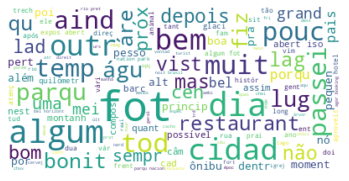

In [123]:
texto_unico_nao_verbo = obter_texto_unico(informacoes_fonte_de_dados, 'documento_nao_verbo')
gerar_nuvem_palavras(texto_unico_nao_verbo)

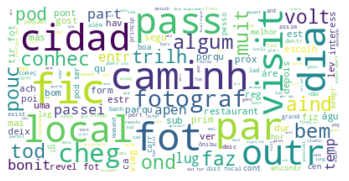

In [124]:
texto_unico = obter_texto_unico(informacoes_fonte_de_dados, 'documento')
gerar_nuvem_palavras(texto_unico)